# Statistical Thinking in Python Notes

In [1]:
import sys
import datetime as dt

In [2]:
# Notebook Info
nb_info = {'Author':'Simon Zahn', 'Last Updated':dt.datetime.now().strftime('%Y-%m-%d %H:%M'), 'Python Version':sys.version }

for k,v in nb_info.items():
    print((k + ':').ljust(18), str(v))

Author:            Simon Zahn
Last Updated:      2019-07-28 14:35
Python Version:    3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


--------------------------

### Table of Contents

1. [Imports and Top Matter](#Imports-and-Top-Matter)
1. [Introduction to Exploratory Data Analysis](#Introduction-to-Exploratory-Data-Analysis)
1. [Discrete and Continuous Variables](#Discrete-and-Continuous-Variables)
1. [Parameter Estimation via Optimization](#Parameter-Estimation-via-Optimization)
1. [Bootstrap Confidence Intervals](#Bootstrap-Confidence-Intervals)
1. [Introduction to Hypothesis Testing](#Introduction-to-Hypothesis-Testing)
1. [Hypothesis Testing Examples](#Hypothesis-Testing-Examples)
1. [Darwin's Finches Example](#Darwin's-Finches-Example)
--------------------------

### Imports and Top Matter
[[back to top]](#Table-of-Contents)

In [115]:
# standard library
import itertools
import functools

# general

# IPython
from IPython.display import display, Image

# analysis
import numpy as np
import pandas as pd
from scipy import stats, special

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
pal = sns.color_palette()

### Introduction to Exploratory Data Analysis
[[back to top]](#Table-of-Contents)

Fun fact: EDA was first detailed by John Tukey (and he wrote a book called Exploratory Data Analysis)  
Can use 
```python
_ = plt.plot(…)
```
so you don't see the arrays returns, just the plot

ECDF = empirical cumulative distribution function


In [5]:
def ecdf(data):
    """Compute the empirical cumulative distribution function (ecdf) for a one-dimensional array of measurements."""
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

We can use the ECDF to compare the distribution of data. Here, we compare a random sample of 100 data points to the theoretical normal distribution; if they look the same, we can assume the data is normally distributed.

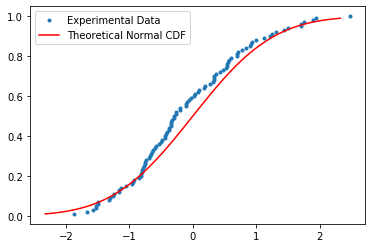

In [6]:
normal_dist = np.random.normal(size=100)
x1, y1 = ecdf(normal_dist)

x2 = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 1000)
y2 = stats.norm.cdf(x2)

plt.plot(x1, y1, '.', label='Experimental Data');
plt.plot(x2, y2, 'r-', label='Theoretical Normal CDF');
plt.legend();

Use 
```python
np.percentile()
```
to compute the percentiles, can pass an array-like of percentiles to calculate.  
  
**Covariance:** If we calculate the mean for the x and y axes, we can then calculate the difference of each of these points to the means. The covariance is the mean of the product of these differences. 

$$ \text{cov} = \frac{1}{n}\sum_{i}^{n} \left( x_i - \bar{x} \right) \left( y_i - \bar{y} \right) $$ 

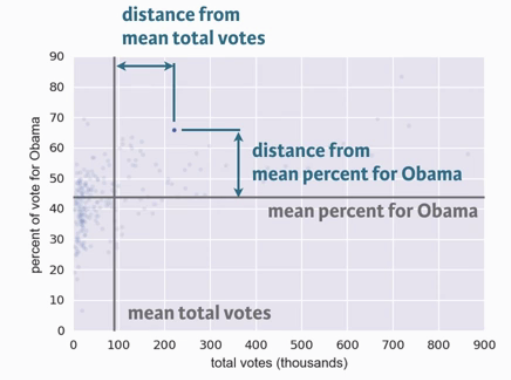

In [7]:
Image("Images/stat-thinking cov definition.png")

The covariance may be computed using the Numpy function
```python
np.cov()
``` 
For example, we have two sets of data `x` and `y`, `np.cov(x, y)` returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in `x`, and entry [1,1] is the variance of the data in `y`. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

We want to have a more generally applicable measure of how variables depend on each other, so we want it to be dimensionless; we remove dimensions by dividing by the product of the standard deviations of the x and y variables:
 - This is called the Pearson correlation coefficient, denoted by $\rho$
 - This is the (variability due to codependence) / (independent variability)
 - Dimensionless, ranges from -1 to 1
 
$$ \rho = \frac{\text{cov}\left(x, y\right)}{\sigma_x \sigma_y} $$

The Pearson correlation coefficient, also called the Pearson $r$, is often easier to interpret than the covariance. It is computed using the
```python
np.corrcoef()
```
function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1]

### Discrete and Continuous Variables
[[back to top]](#Table-of-Contents)

**Bernoulli Trial:** an experiment with two outcomes: true or false  
**Probability Mass Function (pmf):**  the set of probabilities of discrete outcomes  

Distribution is a mathematical description of outcomes  
**Discrete Uniform distribution:** equal probability for each outcome  
**Binomial distribution:** the number of $r$ successes in $n$ Bernoulli trials with the probability $p$ of success is binomially distributed  


One of the easiest ways to view a distribution is to plot a histogram. If you want the histogram to be the pdf, then use `density=True` will make the sum of the data equal 1, i.e. so the data can be a probability distribution.

Text(0.5, 1.0, 'Sample Binomial Distribution with n=10, p=0.5')

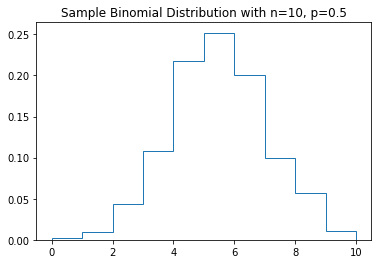

In [8]:
binom_sample = stats.binom(n=10, p=0.5).rvs(size=1000)

plt.hist(binom_sample, density=True, histtype='step');
plt.title('Sample Binomial Distribution with n=10, p=0.5')

##### Poisson Processes and the Poisson Distribution
**Poisson process:** timing of the next event is completely independent of when the previous event happened. Examples of Poisson processes include:
- Natural births in a given hospital
- Hits on a website
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents

**Poisson distribution:** the number $k$ of arrivals of a Poisson process in a given time interval with an average rate of $\lambda$ arrivals per interval is Poisson distributed  
- E.g. the number $k$ of hits on a website in one hour with an average hit rate of 6 hits/hour is Poisson distributed
- The Poisson distribution is a limit of the binomial distribution for a low probability of success and a large number of trials (i.e. rare events). For these limit cases, $\lambda \approx np$.


An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated $\lambda$. The parameter $\lambda$ is the event rate, also called the rate parameter. The probability of observing $k$ events in an interval is given by the equation:
$$ P(k{\text{ events in interval}})=e^{-\lambda }{\frac {\lambda ^{k}}{k!}} $$

where
- $\lambda$  is the average number of events per interval  
- $e$ is the number 2.71828... (Euler's number) the base of the natural logarithms  
- $k$ takes values 0, 1, 2, …  
- $k! = k × (k − 1) × (k − 2) × … × 2 × 1$ is the factorial of $k$.

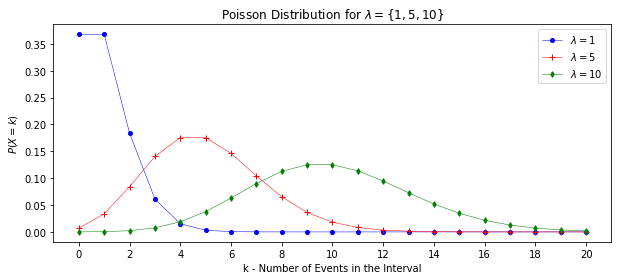

In [9]:
x = np.arange(0, 21)

# SciPy uses mu instead of λ for the rate parameter
P1 = stats.poisson.pmf(k=x, mu=1)
P5 = stats.poisson.pmf(k=x, mu=5)
P10 = stats.poisson.pmf(k=x, mu=10)

plt.figure(figsize=(10, 4))
plt.plot(x, P1, 'bo-', label='$\lambda = 1$', markersize=4, linewidth=0.5)
plt.plot(x, P5, 'r+-', label='$\lambda = 5$', linewidth=0.5)
plt.plot(x, P10, 'gd-', label='$\lambda = 10$', markersize=4, linewidth=0.5)
plt.title('Poisson Distribution for $\lambda = \{1, 5, 10\}$')
plt.xlabel('k - Number of Events in the Interval')
plt.xticks(np.arange(0, 21, 2))
plt.ylabel('$P(X=k)$')
plt.legend();

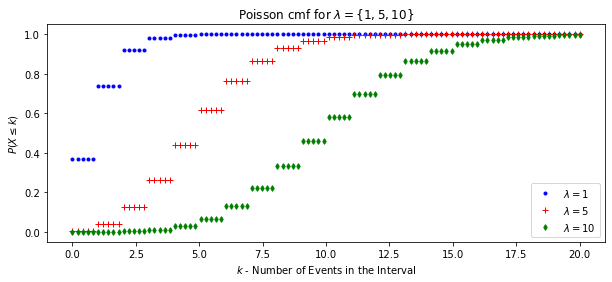

In [10]:
x = np.linspace(0, 20, 100)

C1 = stats.poisson.cdf(k=x, mu=1)
C5 = stats.poisson.cdf(k=x, mu=5)
C10 = stats.poisson.cdf(k=x, mu=10)

plt.figure(figsize=(10, 4))
plt.plot(x, C1, 'b.', label='$\lambda = 1$')
plt.plot(x, C5, 'r+', label='$\lambda = 5$')
plt.plot(x, C10, 'gd', label='$\lambda = 10$', markersize=4)
plt.title('Poisson cmf for $\lambda = \{1, 5, 10\}$')
plt.xlabel('$k$ - Number of Events in the Interval')
plt.ylabel('$P(X \leq k)$')
plt.legend(loc='lower right');

##### Continuous Variables
- Probability Density Function (pdf) - the continuous analogue to the pmf
- ECDF is a good way to compare the distribution of a data to a theoretical distribution
  - Can compute ECDF of data and cdf of the theoretical distribution on the same plot to compare
- When plotting histograms, using the keyword argument `density=True` normalized the histogram and makes it a valid pmf, and using `histtype='step'` makes the plot look much like the smooth theoretical pdf
- For a normal distribution the ECDF will pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal
  - The width of the cdf varies with the standard deviation
  
##### Exponential Distribution
The exponential distribution is like the continuous version of the Poisson distribution
- Describes time between events in a Poisson process (continuous)
- Poisson distribution is the number of events in a fixed time period (discrete)
- E.g. Poisson distribution is the discrete number of events, exponential is the time between events for Poisson processes

The probability density function (pdf) of an exponential distribution is

$$ f(x;\lambda )={\begin{cases}\lambda e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}$$
Here $\lambda > 0$ is the parameter of the distribution, also called the rate parameter. The distribution is supported on the interval $[0, \infty)$. If a random variable $X$ has this distribution, we write $X \sim \operatorname{Exp}(\lambda)$.

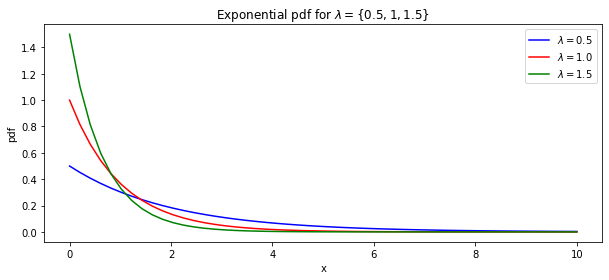

In [11]:
x = np.linspace(0, 10, 50)

# SciPy uses scale factor, where scale = 1/λ
exp1 = stats.expon.pdf(x, scale = 1/0.5)    # λ = 0.5
exp2 = stats.expon.pdf(x, scale = 1/1.0)    # λ = 1.0
exp3 = stats.expon.pdf(x, scale = 1/1.5)    # λ = 1.5

plt.figure(figsize=(10, 4))
plt.plot(x, exp1, 'b-', label='$\lambda = 0.5$')
plt.plot(x, exp2, 'r-', label='$\lambda = 1.0$')
plt.plot(x, exp3, 'g-', label='$\lambda = 1.5$', markersize=4)
plt.title('Exponential pdf for $\lambda = \{0.5, 1, 1.5\}$')
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend(loc='upper right');

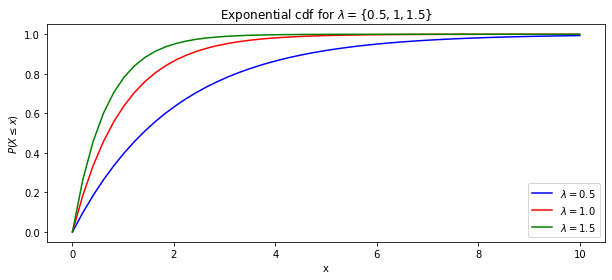

In [12]:
x = np.linspace(0, 10, 50)

# SciPy uses scale factor, where scale = 1/λ
exp1 = stats.expon.cdf(x, scale = 1/0.5)    # λ = 0.5
exp2 = stats.expon.cdf(x, scale = 1/1.0)    # λ = 1.0
exp3 = stats.expon.cdf(x, scale = 1/1.5)    # λ = 1.5

plt.figure(figsize=(10, 4))
plt.plot(x, exp1, 'b-', label='$\lambda = 0.5$')
plt.plot(x, exp2, 'r-', label='$\lambda = 1.0$')
plt.plot(x, exp3, 'g-', label='$\lambda = 1.5$', markersize=4)
plt.title('Exponential cdf for $\lambda = \{0.5, 1, 1.5\}$')
plt.xlabel('x')
plt.ylabel('$P(X \leq x)$')
plt.legend(loc='lower right');

### Parameter Estimation via Optimization
[[back to top]](#Table-of-Contents)

**Optimal Parameters:** the parameter values that bring the model closest to the empirical data.

If the data with optimal parameters from a Poisson process can be mapped to an exponential distribution, that tells us the process.

**Linear Regression**
- Want to find best fit line
- Distance between any point and the regression (the offset or error) is called the residual
- We can find the best fit line using `np.polyfit()`


In [13]:
def gen_linreg_data(β, stdev, size=25, x_min=0, x_max=10, β0=0, include_noise=True):
    """\
Generate linear regression dataset.
y = β*x + β0 + e,

where

β is the regression coefficient

β0 is the intercept parameter

ϵ is the error term, disturbance term, or sometimes noise (in contrast with the "signal" provided by the rest of the model).\
This variable captures all other factors which influence the dependent variable y other than the regressors x.\
The relationship between the error term and the regressors, for example their correlation, is a crucial consideration\
in formulating a linear regression model, as it will determine the appropriate estimation method.
    """
    x = (np.random.rand(size) + x_min) * x_max
    ϵ = np.random.rand(size) * stdev * include_noise
    y = (β*x) + β0 + ϵ
    return x, y

slope: 9.982324011689764 intercept: 4.765544694463454


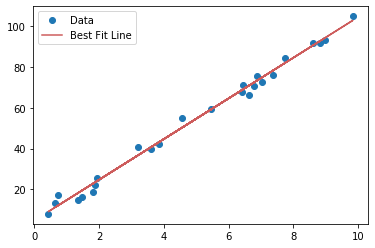

In [14]:
x, y = gen_linreg_data(10, stdev=10, size=25)
plt.plot(x, y, 'o', label='Data')

a, b = np.polyfit(x, y, deg=1)
y_reg = (x * a) + b

print('slope:', a, 'intercept:', b)
plt.plot(x, y_reg, color='indianred', label='Best Fit Line')
plt.legend(loc='upper left')

### Bootstrap Confidence Intervals
[[back to top]](#Table-of-Contents)

Take your sample data, and resample with replacement $n$ times
- *Bootstrap sample* is each resample array
- *Bootstrap replicate* is the summary statistics computed from the bootstrap sample

If you bootstrap the size of the dataset `(len(bootstrap_sample) = len(sample_data))` and do that 50 times, you can plot the actual data over a number of bootstrap samples giving you an idea of the spread of the data. We can write a function to take a bootstrap replicate from a 1-dimentional sample:

In [15]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

First, we generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [16]:
rainfall = np.array([
875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,  878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,  803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,  883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,  936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,  700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,  770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,  789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,  595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
572.4, 1146.4,  728.2,  864.2,  793. ])

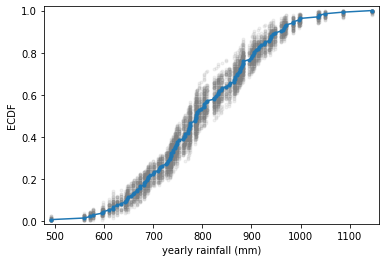

In [17]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF');

In [18]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

Now, we compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the pdf as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the *standard error of the mean*, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`. Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

Standard Error of the Mean:        10.510549150506188
Standard Deviation of Replicates:  10.381898731916618


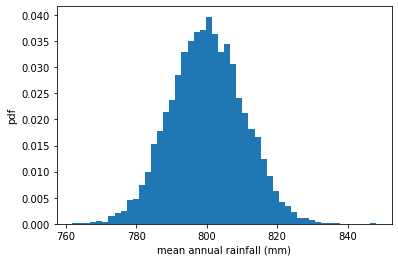

In [19]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print("Standard Error of the Mean:".ljust(35) + f"{sem}")

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print("Standard Deviation of Replicates:".ljust(35) + f"{bs_std}")

# Make a histogram of the results
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('pdf');

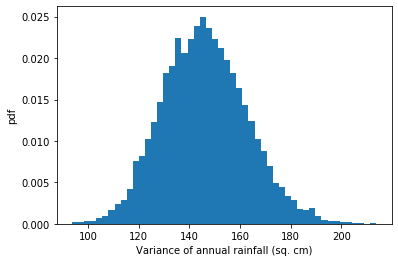

In [20]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
plt.hist(bs_replicates, density=True, bins=50)
plt.xlabel('Variance of annual rainfall (sq. cm)')
plt.ylabel('pdf');

##### Bootstrap Confidence Intervals
- **Confidence Interval:** if we repeated measurements over and over again, $x\%$ of the observed values would lie within the $x\%$ confidence interval
- If we want a 95% confidence interval, we can take our bootstrap samples and use np.percentile to computer the 2.5th and 97.5th percentiles and what was in the middle was our 95% CI

95% confidence interval = [779.28462406 820.80289474]


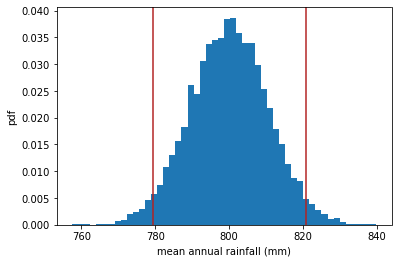

In [21]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print(f'95% confidence interval = {conf_int}')

# Make a histogram of the results
plt.hist(bs_replicates, bins=50, density=True)
plt.axvline(x=conf_int[0], color='firebrick')
plt.axvline(x=conf_int[1], color='firebrick')
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('pdf');

##### Pairs Bootstrap

The pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, we write a function to perform pairs bootstrap on a set of x,y data.

In [22]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg=1)

    return bs_slope_reps, bs_intercept_reps

Using the function we just wrote, perform the pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope.

In [23]:
illiteracy = np.array([9.5,49.2,1.,11.2,9.8,60.,50.2,51.2,0.6,1.,8.5,6.1,9.8,1.,42.2,77.2,18.7,22.8,8.5,
                       43.9,1.,1.,1.5,10.8,11.9,3.4,0.4,3.1,6.6,33.7,40.4,2.3,17.2,0.7,36.1,1.,33.2,55.9,
                       30.8,87.4,15.4,54.6,5.1,1.1,10.2,19.8,0.,40.7,57.2,59.9,3.1,55.7,22.8,10.9,34.7,
                       32.2,43.,1.3,1.,0.5,78.4,34.2,84.9,29.1,31.3,18.3,81.8,39.,11.2,67.,4.1,0.2,78.1,
                       1.,7.1,1.,29.,1.1,11.7,73.6,33.9,14.,0.3,1.,0.8,71.9,40.1,1.,2.1,3.8,16.5,4.1,0.5,
                       44.4,46.3,18.7,6.5,36.8,18.6,11.1,22.1,71.1,1.,0.,0.9,0.7,45.5,8.4,0.,3.8,8.5,2.,
                       1.,58.9,0.3,1.,14.,47.,4.1,2.2,7.2,0.3,1.5,50.5,1.3,0.6,19.1,6.9,9.2,2.2,0.2,12.3,
                       4.9,4.6,0.3,16.5,65.7,63.5,16.8,0.2,1.8,9.6,15.2,14.4,3.3,10.6,61.3,10.9,32.2,9.3,
                       11.6,20.7,6.5,6.7,3.5,1.,1.6,20.5,1.5,16.7,2.,0.9])

fertility = np.array([1.769,2.682,2.077,2.132,1.827,3.872,2.288,5.173,1.393,1.262,2.156,3.026,2.033,1.324,
                      2.816,5.211,2.1,1.781,1.822,5.908,1.881,1.852,1.39,2.281,2.505,1.224,1.361,1.468,
                      2.404,5.52,4.058,2.223,4.859,1.267,2.342,1.579,6.254,2.334,3.961,6.505,2.53,2.823,
                      2.498,2.248,2.508,3.04,1.854,4.22,5.1,4.967,1.325,4.514,3.173,2.308,4.62,4.541,5.637,
                      1.926,1.747,2.294,5.841,5.455,7.069,2.859,4.018,2.513,5.405,5.737,3.363,4.89,1.385,
                      1.505,6.081,1.784,1.378,1.45,1.841,1.37,2.612,5.329,5.33,3.371,1.281,1.871,2.153,
                      5.378,4.45,1.46,1.436,1.612,3.19,2.752,3.35,4.01,4.166,2.642,2.977,3.415,2.295,3.019,
                      2.683,5.165,1.849,1.836,2.518,2.43,4.528,1.263,1.885,1.943,1.899,1.442,1.953,4.697,
                      1.582,2.025,1.841,5.011,1.212,1.502,2.516,1.367,2.089,4.388,1.854,1.748,2.978,2.152,
                      2.362,1.988,1.426,3.29,3.264,1.436,1.393,2.822,4.969,5.659,3.24,1.693,1.647,2.36,
                      1.792,3.45,1.516,2.233,2.563,5.283,3.885,0.966,2.373,2.663,1.251,2.052,3.371,2.093,
                      2.,3.883,3.852,3.718,1.732,3.928])

[0.04395723 0.05522863]


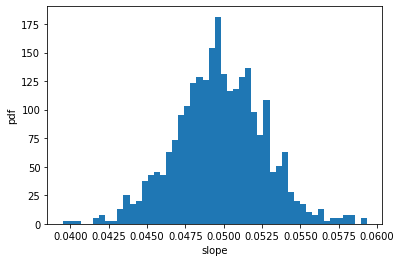

In [24]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel('slope')
plt.ylabel('pdf');

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. We can do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

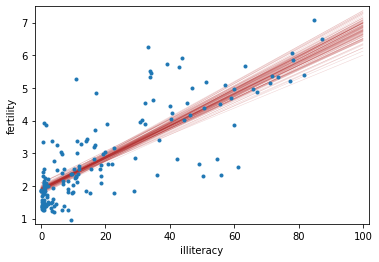

In [25]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='firebrick')

# Plot the data
plt.plot(illiteracy, fertility, linestyle='none', marker='.')

# Label axes, set the margins, and show the plot
plt.xlabel('illiteracy')
plt.ylabel('fertility')
plt.margins(0.02);

### Introduction to Hypothesis Testing
[[back to top]](#Table-of-Contents)

To test how reasonable the observed data are, assuming a hypothesis (the null hypothesis) is true and validate the data against this hypothesis.

**Test Statistic:** A single number that can be computed from observed data and from data you simulate under the null hypothesis. A test statistic serves as a basis of comparison between the null and alternative hypotheses.

Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so here we will write a function to generate a permutation sample from two data sets. A permutation sample of two arrays having respectively $n1$ and $n2$ entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first $n1$ entries as the permutation sample of the first array and the last $n2$ entries as the permutation sample of the second array.

In [26]:
def permutation_sample(data_1, data_2):
    permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))
    return permuted_data[:len(data_1)], permuted_data[len(data_1):]

To help see how permutation sampling works, we can generate permutation samples and look at them graphically. We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed. The data are stored in the Numpy arrays rain_june and rain_november.

In [27]:
rain_june = np.array([66.2,39.7,76.4,26.5,11.2,61.8,6.1,48.4,89.2,104.,34.,60.6,57.1,79.1,90.9,
                      32.3,63.8,78.2,27.5,43.4,30.1,17.3,77.5,44.9,92.2,39.6,79.4,66.1,53.5,98.5,
                      20.8,55.5,39.6,56.,65.1,14.8,13.2,88.1,8.4,32.1,19.6,40.4,2.2,77.5,105.4,
                      77.2,38.,27.1,111.8,17.2,26.7,23.3,77.2,87.2,27.7,50.6,60.3,15.1,6.,29.4,
                      39.3,56.3,80.4,85.3,68.4,72.5,13.3,28.4,14.7,37.4,49.5,57.2,85.9,82.1,31.8,
                      126.6,30.7,41.4,33.9,13.5,99.1,70.2,91.8,61.3,13.7,54.9,62.5,24.2,69.4,
                      83.1,44.,48.5,11.9,16.6,66.4,90.,34.9,132.8,33.4,225.,7.6,40.9,76.5,48.,
                      140.,55.9,54.1,46.4,68.6,52.2,108.3,14.6,11.3,29.8,130.9,152.4,61.,46.6,
                      43.9,30.9,111.1,68.5,42.2,9.8,285.6,56.7,168.2,41.2,47.8,166.6,37.8,45.4,
                      43.2])

rain_november = np.array([83.6,30.9,62.2,37.,41.,160.2,18.2,122.4,71.3,44.2,49.1,37.6,114.5,28.8,
                          82.5,71.9,50.7,67.7,112.,63.6,42.8,57.2,99.1,86.4,84.4,38.1,17.7,102.2,
                          101.3,58.,82.,101.4,81.4,100.1,54.6,39.6,57.5,29.2,48.8,37.3,115.4,
                          55.6,62.,95.,84.2,118.1,153.2,83.4,104.7,59.,46.4,50.,147.6,76.8,59.9,
                          101.8,136.6,173.,92.5,37.,59.8,142.1,9.9,158.2,72.6,28.,112.9,119.3,
                          199.2,50.7,44.,170.7,67.2,21.4,61.3,15.6,106.,116.2,42.3,38.5,132.5,
                          40.8,147.5,93.9,71.4,87.3,163.7,141.4,62.6,84.9,28.8,121.1,28.6,32.4,
                          112.,50.,96.9,81.8,70.4,117.5,41.2,124.9,78.2,93.,53.5,50.5,42.6,47.9,
                          73.1,129.1,56.9,103.3,60.5,134.3,93.1,49.5,48.2,167.9,27.,111.1,55.4,
                          36.2,57.4,66.8,58.3,60.,161.6,112.7,37.4,110.6,56.6,95.8,126.8])

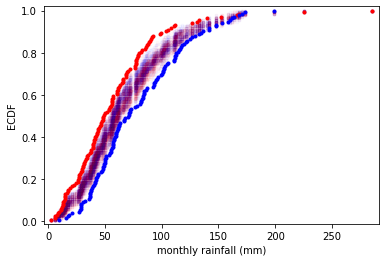

In [28]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF');

**p-value:** the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

A permutation replicate is a single value of a statistic computed from a permutation sample. As the `draw_bs_reps()` function from earlier is useful to generate bootstrap replicates, it is useful to have a similar function, `draw_perm_reps()`, to generate permutation replicates.

In [29]:
def draw_perm_reps(d1, d2, func, size=1):
    """Generate multiple permutation replicates."""
    return np.array([func(*permutation_sample(d1, d2)) for i in range(size)])

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. We will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

In [30]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453, 0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383, 0.457, 0.73 ])
force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711, 0.614, 0.468])

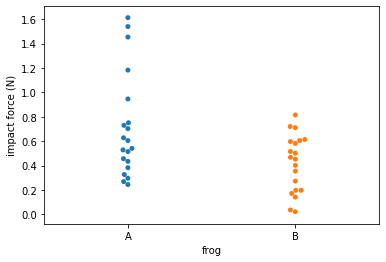

In [31]:
# put data into a DataFrame
df = pd.DataFrame([('A', x) for x in force_a] + [('B', x) for x in force_b], columns=['frog', 'impact_force'])

# Make bee swarm plot
sns.swarmplot(x='frog', y='impact_force', data=df)
plt.ylabel('impact force (N)');

Our test statistic will be the difference in the average strike force. The average strike force for Frog A was 0.71 Newtons (N), and for Frog B it was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. We compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

In [32]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    return np.mean(data_1) - np.mean(data_2)

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0051


In this example, since our null hypothesis is that the average strike force is the same (diff of means ~ 0), and this shows the difference in our bootstrap replicate was only greater than the actual value ~0.6% of the time.

**Pipeline for Hypothesis Testing**:
1. Clearly state the null hypothesis
2. Define your test statistic
3. Generate many sets of simulated data assuming the null hypothesis is true
4. Compute the test statistic for each simulated data set
5. The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

### Hypothesis Testing Examples
[[back to top]](#Table-of-Contents)

As a final exercise in hypothesis testing, we will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants. In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. We look at how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual: plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).

In [33]:
control = np.array([4.159234,4.408002,0.172812,3.498278,3.104912,5.164174,6.615262,4.633066,0.170408,2.65,
                     0.0875,1.997148,6.92668,4.574932,3.896466,5.209814,3.70625,0.,4.62545,3.01444,0.732652,
                     0.4,6.518382,5.225,6.218742,6.840358,1.211308,0.368252,3.59937,4.212158,6.052364,
                     2.115532,6.60413,5.26074,6.05695,6.481172,3.171522,3.057228,0.218808,5.215112,
                     4.465168,2.28909,3.732572,2.17087,1.834326,6.074862,5.841978,8.524892,4.698492,
                     2.965624,2.324206,3.409412,4.830726,0.1,0.,4.101432,3.478162,1.009688,4.999296,
                     4.32196,0.299592,3.606032,7.54026,4.284024,0.057494,6.036668,2.924084,4.150144,
                     1.256926,4.666502,4.806594,2.52478,2.027654,2.52283,4.735598,2.033236,0.,6.177294,
                     2.601834,3.544408,3.6045,5.520346,4.80698,3.002478,3.559816,7.075844,10.,0.139772,
                     6.17171,3.201232,8.459546,0.17857,7.088276,5.496662,5.415086,1.932282,3.02838,7.47996,
                     1.86259,7.838498,2.242718,3.292958,6.363644,4.386898,8.47533,4.156304,1.463956,
                     4.533628,5.573922,1.29454,7.547504,3.92466,5.820258,4.118522,4.125,2.286698,0.591882,
                     1.273124,0.,0.,0.,12.22502,7.601604,5.56798,1.679914,8.77096,5.823942,0.258374,0.,
                     5.899236,5.486354,2.053148,3.25541,2.72564,3.364066,2.43427,5.282548,3.963666,0.24851,
                     0.347916,4.046862,5.461436,4.066104,0.,0.065])

treated = np.array([1.342686,1.058476,3.793784,0.40428,4.528388,2.142966,3.937742,0.1375,6.919164,0.,3.597812,
                    5.196538,2.78955,2.3229,1.090636,5.323916,1.021618,0.931836,2.78,0.412202,1.180934,2.8674,
                    0.,0.064354,3.008348,0.876634,0.,4.971712,7.280658,4.79732,2.084956,3.251514,1.9405,
                    1.566192,0.58894,5.219658,0.977976,3.124584,1.297564,1.433328,4.24337,0.880964,2.376566,
                    3.763658,1.918426,3.74,3.841726,4.69964,4.386876,0.,1.127432,1.845452,0.690314,4.185602,
                    2.284732,7.237594,2.185148,2.799124,3.43218,0.63354,1.142496,0.586,2.372858,1.80032,
                    3.329306,4.028804,3.474156,7.508752,2.032824,1.336556,1.906496,1.396046,2.488104,4.759114,
                    1.07853,3.19927,3.814252,4.275962,2.817056,0.552198,3.27194,5.11525,2.064628,0.,3.34101,
                    6.177322,0.,3.66415,2.352582,1.531696])

Text(0, 0.5, 'ECDF')

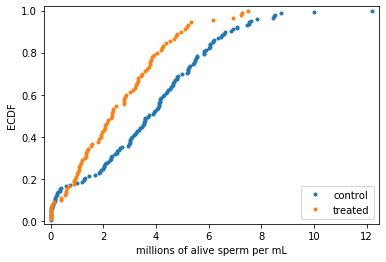

In [34]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')

Now, we will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. Lets use the difference of means as our test statistic.

In [35]:
# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control, treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed. In fact, when I did the calculation with 10 million replicates, I got a p-value of 2e-5.

### Darwin's Finches Example
[[back to top]](#Table-of-Contents)

Every year for the past 40-plus years, Peter and Rosemary Grant of Princeton University have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. We'll use this data to work through a full example.

In [46]:
beaks_1975 = pd.read_csv('data/finch_beaks_1975.csv', )
beaks_1975['year'] = 1975
beaks_2012 = pd.read_csv('data/finch_beaks_2012.csv')
beaks_2012['year'] = 2012

df = pd.DataFrame(np.concatenate([beaks_1975.values, beaks_2012.values]),
                  columns=['band', 'species', 'beak_length', 'beak_depth', 'year'])

df.band = pd.to_numeric(df.band)
df.beak_length = pd.to_numeric(df.beak_length)
df.beak_depth = pd.to_numeric(df.beak_depth)

df.species = df.species.astype('category')
df.year = df.year.astype('category')

We first foray into the Darwin finch data by looking at the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

Let's start with looking at the beak depth of G. scandens on Daphne Major in 1975 and in 2012.

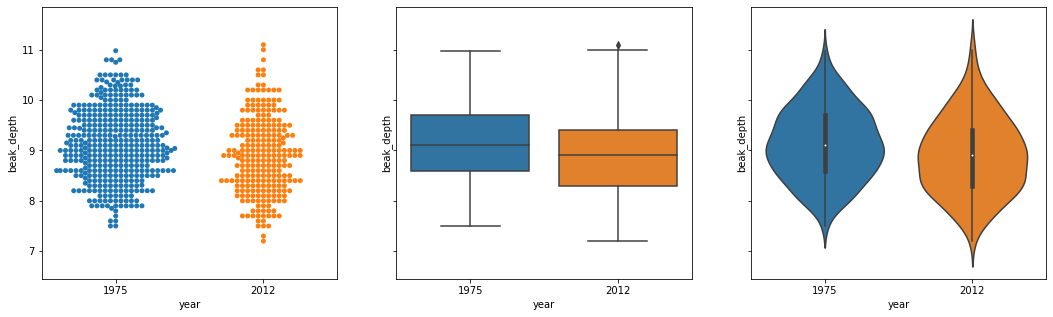

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5), sharey='row')

sns.swarmplot(x='year', y='beak_depth', data=df, ax=ax1)
sns.boxplot(x='year', y='beak_depth', data=df, ax=ax2)
sns.violinplot(x='year', y='beak_depth', data=df, ax=ax3);

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly lower, and it might have a bigger variance.

While bee swarm plots are useful, ECDFs are often even better when doing EDA. Lets plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

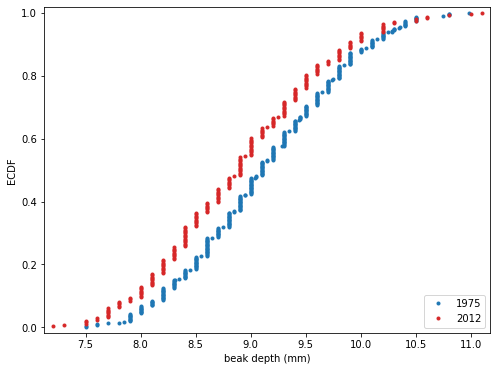

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Compute ECDFs
x_1975, y_1975 = ecdf(df.loc[df['year'] == 1975]['beak_depth'].values)
x_2012, y_2012 = ecdf(df.loc[df['year'] == 2012]['beak_depth'].values)

# Plot the ECDFs
plt.plot(x_1975, y_1975, marker='.', color=pal[0], linestyle='none', label='1975')
plt.plot(x_2012, y_2012, marker='.', color=pal[3], linestyle='none', label='2012')

# Set margins
plt.margins(.02)

# Add axis labels and legend
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(loc='lower right');

Lets estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [49]:
# Compute the difference of the sample means: mean_diff
means = df.groupby(by='year')['beak_depth'].mean()
mean_diff = means[1975] - means[2012]

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(df.loc[df['year'] == 1975]['beak_depth'].values, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(df.loc[df['year'] == 2012]['beak_depth'].values, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_1975 - bs_replicates_2012

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22313275434242108 mm
95% confidence interval = [0.10498705 0.34000791] mm


The plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten shallower. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [51]:
# Compute mean of combined data set: combined_mean
combined_mean = df['beak_depth'].mean()

# Shift the samples
bd_1975_shifted = df.loc[df['year'] == 1975]['beak_depth'].values + (combined_mean - means[1975])
bd_2012_shifted = df.loc[df['year'] == 2012]['beak_depth'].values - (means[2012] - combined_mean)

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=25000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=25000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_replicates_2012)

# Print p-value
print('p =', p)

p = 0.0002


We get a p-value of 0.0002, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! Previously, we got a difference of 0.22 mm between the means. We should combine this with the statistical significance. Changing by 0.22 mm in 37 years is substantial by evolutionary standards.

Now let's look at the beak shape, as a function of both the depth and the length. If these items change together, then the beak size changes but the shape stays the same overall; otherwise, the shape of the beak will change.

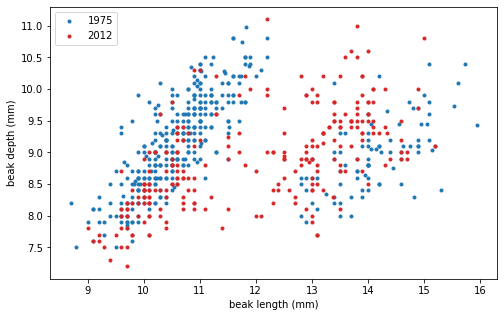

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 1975 data
ax.plot(df.loc[df['year'] == 1975]['beak_length'].values,
        df.loc[df['year'] == 1975]['beak_depth'].values,
        color=pal[0], marker='.', linestyle='none', label='1975')

# 2012 data
ax.plot(df.loc[df['year'] == 2012]['beak_length'].values,
        df.loc[df['year'] == 2012]['beak_depth'].values,
        color=pal[3], marker='.', linestyle='none', label='2012')

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(loc='upper left');

In looking at the plot, we see that beaks may have gotten shallower (the red points are typically lower in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and shallower.

Now lets perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line, and then display the linear regression results on the scatter plot for the first 100 bootstrap samples.

In [96]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(df.loc[df['year'] == 1975]['beak_length'].values,
                                        df.loc[df['year'] == 1975]['beak_depth'].values, deg=1)

slope_2012, intercept_2012 = np.polyfit(df.loc[df['year'] == 2012]['beak_length'].values,
                                        df.loc[df['year'] == 2012]['beak_depth'].values, deg=1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(df.loc[df['year'] == 1975]['beak_length'].values,
                                                                  df.loc[df['year'] == 1975]['beak_depth'].values,
                                                                  size=1000)

bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(df.loc[df['year'] == 2012]['beak_length'].values,
                                                                  df.loc[df['year'] == 2012]['beak_depth'].values,
                                                                  size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975'.center(60, '_'), end='\n\n')
print('slope ='.rjust(12), '{:6f}'.format(slope_1975), 'conf int ='.rjust(12), slope_conf_int_1975)
print('intercept ='.rjust(12), '{:6f}'.format(intercept_1975), 'conf int ='.rjust(12), intercept_conf_int_1975)
print()
print('2012'.center(60, '_'), end='\n\n')
print('slope ='.rjust(12), '{:6f}'.format(slope_2012), 'conf int ='.rjust(12), slope_conf_int_2012)
print('intercept ='.rjust(12), '{:6f}'.format(intercept_2012), 'conf int ='.rjust(12), intercept_conf_int_2012)

____________________________1975____________________________

     slope = 0.094597   conf int = [0.05396627 0.13364241]
 intercept = 8.053908   conf int = [7.61334307 8.52696163]

____________________________2012____________________________

     slope = 0.279421   conf int = [0.2362679  0.32213738]
 intercept = 5.548559   conf int = [5.05900577 6.05018281]


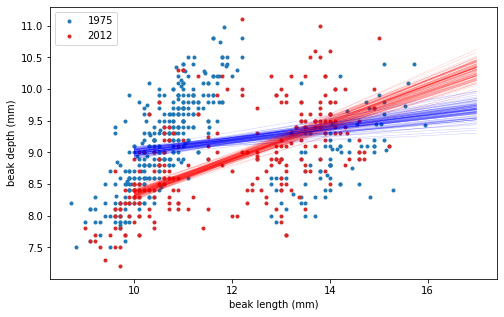

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 1975 scatter plot
ax.plot(df.loc[df['year'] == 1975]['beak_length'].values,
        df.loc[df['year'] == 1975]['beak_depth'].values,
        color=pal[0], marker='.', linestyle='none', label='1975')

# 2012 scatter plot
ax.plot(df.loc[df['year'] == 2012]['beak_length'].values,
        df.loc[df['year'] == 2012]['beak_depth'].values,
        color=pal[3], marker='.', linestyle='none', label='2012')

# linear regressions
x = np.array([10, 17])
for i in range(100):
    ax.plot(x, (bs_slope_reps_1975[i]*x) + bs_intercept_reps_1975[i], linewidth=0.5, alpha=0.2, color='blue')
    ax.plot(x, (bs_slope_reps_2012[i]*x) + bs_intercept_reps_2012[i], linewidth=0.5, alpha=0.2, color='red')

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(loc='upper left');

The linear regressions showed interesting information about the beak geometry. If we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth.

In [113]:
# Compute length-to-depth ratios
ratio_1975 = df.loc[df['year'] == 1975]['beak_length'].values / df.loc[df['year'] == 1975]['beak_depth'].values
ratio_2012 = df.loc[df['year'] == 2012]['beak_length'].values / df.loc[df['year'] == 2012]['beak_depth'].values

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975:'.ljust(10), 'mean ratio ='.rjust(12), '{:6f}'.format(mean_ratio_1975), 'conf int ='.rjust(12), conf_int_1975)
print(''.center(75, '-'))
print('2012:'.ljust(10), 'mean ratio ='.rjust(12), '{:6f}'.format(mean_ratio_2012), 'conf int ='.rjust(12), conf_int_2012)

1975:      mean ratio = 1.246161   conf int = [1.22244355 1.27068112]
---------------------------------------------------------------------------
2012:      mean ratio = 1.348362   conf int = [1.32534447 1.372999  ]
